## Imports 

In [ ]:
#%reload_ext autoreload
#%autoreload 2
#%matplotlib inline

In [ ]:
#pip install pydicom

In [4]:
import os
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
from pathlib import Path
import cv2
from PIL import Image
import numpy as np
# import pydicom
# from pydicom.data import get_testdata_files
import random

In [ ]:
#path_img = Path('images')
#fnames = os.listdir(str(path_img))
#path_lbl = Path('masks')
#lblnames = os.listdir(str(path_lbl))
#fnames.sort()
#lblnames.sort()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing inputs

Use AnnotationsV4

In [6]:

path_lbl = Path('/content/drive/My Drive/Datasets/WSI/01_tiles_annt_v4')
path_img = Path('/content/drive/My Drive/Datasets/WSI/01_tiles')
fnames = get_image_files(path_img)
lbl_names = get_image_files(path_lbl)

In [ ]:
fnames[:5]

In [6]:
lbl_names[:5]

[PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles_annt_v4/mask6144_15360.png'),
 PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles_annt_v4/mask6144_16384.png'),
 PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles_annt_v4/mask6144_17408.png'),
 PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles_annt_v4/mask6144_18432.png'),
 PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles_annt_v4/mask6144_19456.png')]

In [7]:
def get_y_fn(x):
  temp=x.stem.split(sep='_')
  temp.reverse()
  stem='_'.join(temp)
  return path_lbl/f'mask{stem}{x.suffix}'

In [ ]:
#print(fnames[1220])
#get_fn_y(fnames[1220])

/content/drive/My Drive/Datasets/WSI/01_tiles/6144_11264.png


NameError: ignored

In [ ]:
#get_y_fn=lambda x: path_lbl/f'mask{(x.stem).split(sep='_')[-1]}_{(x.stem).split(sep='_')[0]}{x.suffix}'

In [ ]:
# fnames[0]
# # path_img
# # os.path.join(str(path_img),fnames[0])
# fi = os.path.split(fnames[0])[1]
# os.path.splitext(fi)[0]

'01-2461G_(1.01,0,3024,4038,3024)'

In [ ]:
# # Converting to png
#  for k in range(0,len(fnames)):
#    im1 = Image.open(os.path.join(str(path_img),fnames[k]))
#    #im1.save(r'/content/drive/My Drive/Keratin Pearl/01-2461G/exported_files_png/new file name.png')
#   #  ds = pydicom.dcmread(os.path.join(str(path_img),fnames[k]))
#   #  I = ds.pixel_array/np.amax(ds.pixel_array)*255
#   #  I = I.astype('uint8')
#   #  im = Image.fromarray(I)
#    fi = os.path.split(fnames[k])[1]
#    filename = os.path.splitext(fi)[0]
#    im1.save(os.path.join('/content/drive/My Drive/Keratin Pearl/01-2461G/exported_files_png/', filename + '.png')) 

In [ ]:
# fii = os.path.split(fnames[0])[1]
# filename = os.path.splitext(fii)[0]
# filename


'01-2461G_(1.01,0,3024,4038,3024)'

In [ ]:
# #Renaming masks
# for k in range(0,len(lbl_names)):
#    I = Image.open(os.path.join(str(path_lbl),lbl_names[-1]))
#    filename = os.path.splitext(fnames[-1])[0]
#    I.save(os.path.join('/content/drive/My Drive/Keratin Pearl/01-2461G/Train_Sets_masks', filename + '.png')) 

In [ ]:
# #Real Preprocessing ( **PLEASE RUN ONLY ONCE** )
# for i in range(0, len(lbl_names)):   
#    img = cv2.imread(str(lbl_names[i]), 0)
#    new_img = img / 255.0
#    new_img = Image.fromarray((new_img).astype(np.uint8))
#    #plt.imshow(new_img, cmap = 'gray', interpolation = 'bicubic')
#    #plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
#    #plt.show()
#    new_img.save(str(lbl_names[i]))

In [ ]:
# path_img_png = Path('/content/drive/My Drive/Keratin Pearl/01-2461G/exported_files_png')
# fnames_p = get_image_files(path_img_png)

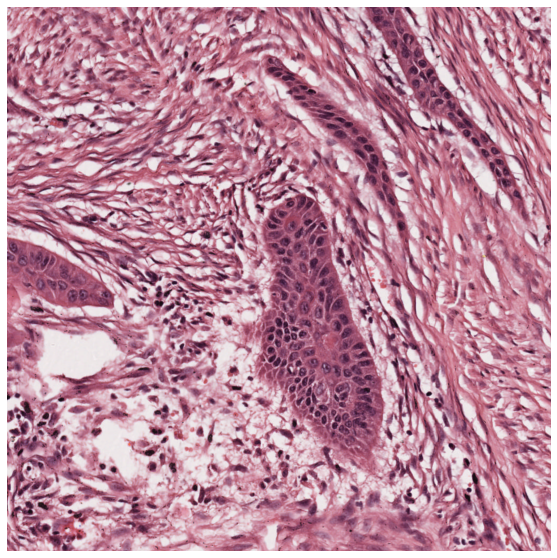

In [ ]:
img_f = fnames[61]
img = open_image(img_f)
img.show(figsize=(10,10))

In [ ]:
img_f
#get_y_fn = lambda x: path_lbl/f'{x.stem}-labels{x.suffix}'

PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles/8192_6144.png')

In [ ]:
lbl_names[1]

PosixPath('/content/drive/My Drive/Keratin Pearl/Tiling/masks/D-001-18_(4.04,16152,8076,4038,4038)-labels.png')

In [8]:
fnames.sort()

In [9]:
img_f=fnames[287]
img_f

PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles/16384_15360.png')

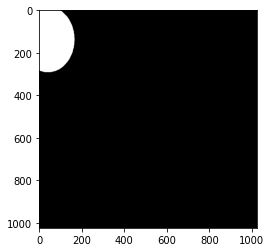

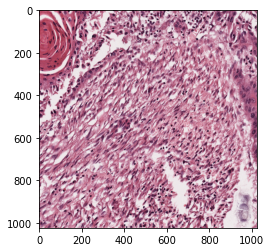

In [17]:
plt.figure()
imant=plt.imread(get_y_fn(img_f))
plt.imshow(imant,cmap='binary_r')
plt.figure()
im=plt.imread(img_f)
plt.imshow(im)

ValueError: ignored

In [ ]:
#plt.imsave('/content/test.png',[[True,False],[False,True]])
#plt.imshow(plt.imread('/content/test.png'))
#im=plt.imread(get_y_fn(img_f))
#print(im.shape)
#im_n=np.expand_dims(im,0)
#im_n.shape


(1024, 1024, 4)


(1, 1024, 1024, 4)

In [ ]:
#for file in lbl_names:
 # print(file.suffix)

In [ ]:
#Adds a channel to all images in directory
'''def add_dim(lbl_names,save_dir):
  for files in lbl_names:
    im=plt.imread(files)
    im=np.expand_dims(im,0)
    if not os.path.exists(save_dir):
      os.mkdir(save_dir)
    cv2.imwrite(f'{save_dir}/{files.stem}{files.suffix}',im)
'''

In [ ]:
#add_dim(lbl_names,'/content/drive/My Drive/Datasets/WSI/01_tiles_annt_v3')

In [ ]:
#im=Image.open(get_y_fn(img_f))
#np.array(type(im))

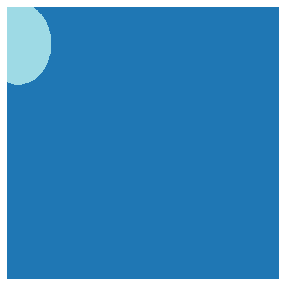

In [10]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [11]:
mask.shape

torch.Size([1, 1024, 1024])

In [12]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([1024, 1024]), tensor([[[1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [13]:
codes = np.array(['Background','Keratin_Pearl'], dtype='<U17'); codes

array(['Background', 'Keratin_Pearl'], dtype='<U17')

## Creating ImageDataBunch

In [14]:
size = src_size

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=2
else:           bs=1
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=1, have 0MB of GPU RAM free


In [18]:
bs=2

In [19]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_rand_pct(0.15)
       .label_from_func(get_y_fn, classes=codes))

In [20]:
data = (src.transform(get_transforms(),size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

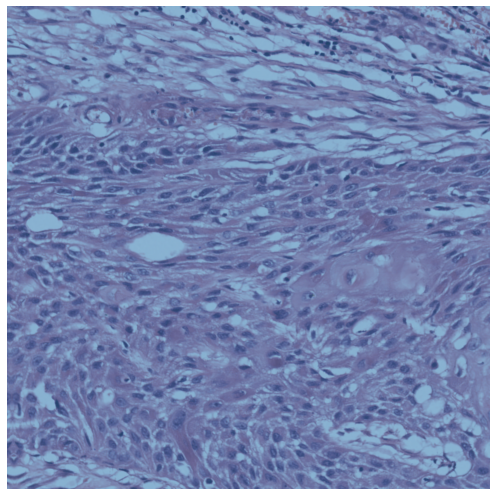

In [25]:
data.show_batch(1, figsize=(10,7))

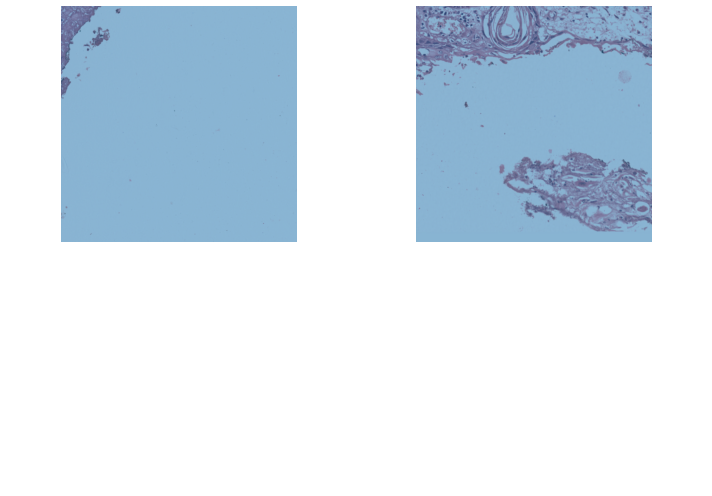

In [26]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

In [ ]:
#mask.data//255

In [137]:
data.train_ds[287][1].data[0,999,:100]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])

In [21]:
name2id = {v:k for k,v in enumerate(codes)}
print(name2id)
#name2id={'Background': 215, 'Keratin_Pearl': 30}
void_code = name2id['Background']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

{'Background': 0, 'Keratin_Pearl': 1}


In [22]:
metrics=acc_camvid
# metrics=accuracy

## Creating Unet Learner Object

In [24]:
wd=1e-2 #weight decay

In [25]:
learn = unet_learner(data, models.resnet34, metrics=[dice,fbeta], wd=wd)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [32]:
len(data.train_ds)

1042

In [ ]:
#learn.summary

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


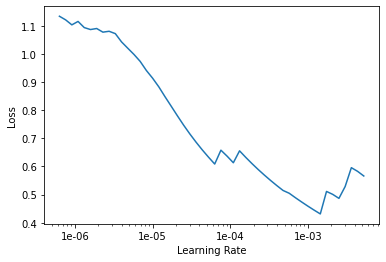

In [34]:
learn.lr_find()
learn.recorder.plot()

In [36]:
lr=2e-4

In [37]:
learn.fit_one_cycle(5, slice(lr), pct_start=0.9)

In [38]:
learn.save('stage-1')

In [40]:
learn.export('/content/drive/My Drive/Datasets/WSI/01-stage-1.pkl')

In [41]:
learn.load('stage-1');

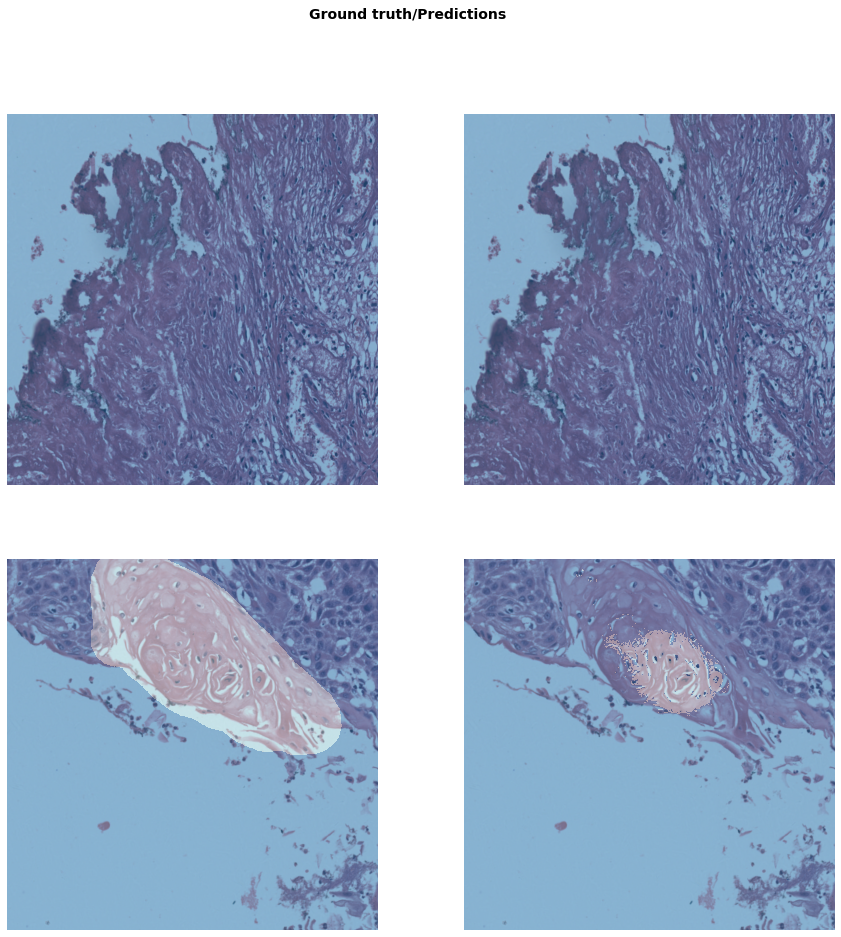

In [42]:
learn.show_results(ds_type=DatasetType.Train, rows=2, figsize=(15,15))

In [45]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


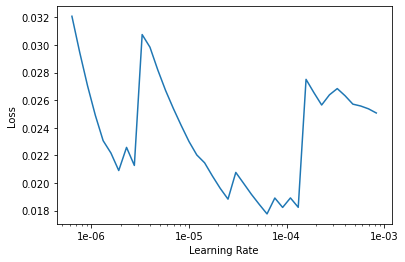

In [48]:
learn.lr_find()
learn.recorder.plot()

In [49]:
lrs = slice(lr/40,lr/4) # learning rate slicing

In [50]:
learn.fit_one_cycle(35, lrs, pct_start=0.8)

Buffered data was truncated after reaching the output size limit.

In [51]:
learn.save('stage-2');

In [52]:
learn.export('/content/drive/My Drive/Datasets/WSI/01-stage-2.pkl')

In [26]:
#learn=load_learner('/content/drive/My Drive/Datasets/WSI/01-stage-2.pkl/archive/')

NotADirectoryError: ignored

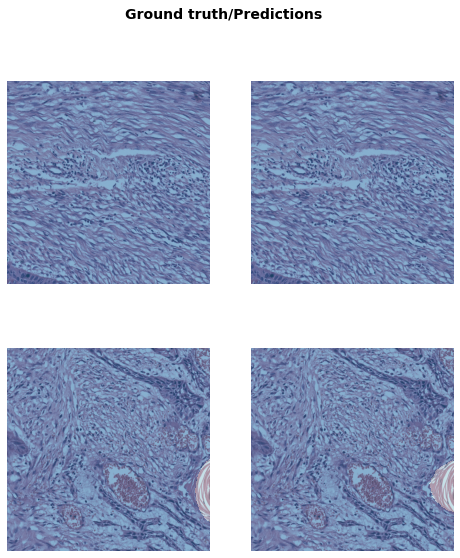

In [27]:
learn.load('stage-2')
learn.show_results(rows=5, figsize=(8,9))

## Predictions on Validation Set

In [28]:
names_valid = data.valid_ds.items
names_valid

array([PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles/11264_13312.png'),
       PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles/32768_18432.png'),
       PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles/9216_4096.png'),
       PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles/20480_3072.png'), ...,
       PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles/21504_16384.png'),
       PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles/13312_33792.png'),
       PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles/12288_21504.png'),
       PosixPath('/content/drive/My Drive/Datasets/WSI/01_tiles/22528_19456.png')], dtype=object)

In [30]:

for i in range(0, len(names_valid)):
    p = learn.predict(data.valid_ds.x[i])
    p[0].save('/content/drive/My Drive/Datasets/WSI/predictions_keratin_pearl/' + names_valid[i].stem + '.png')

KeyboardInterrupt: ignored

## Saving Final Model

In [ ]:
learn.export()

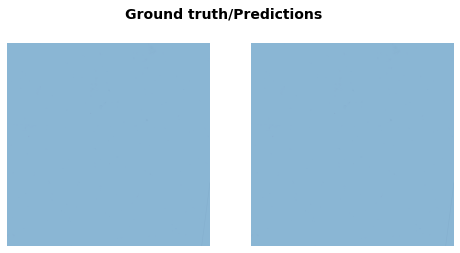

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

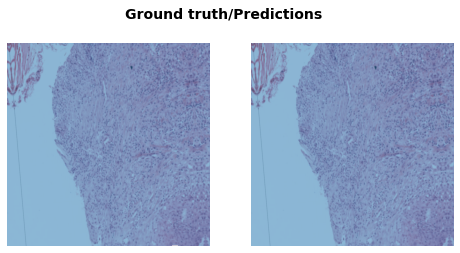

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

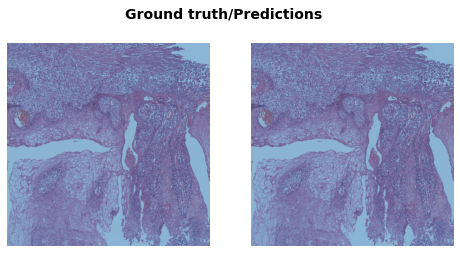

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

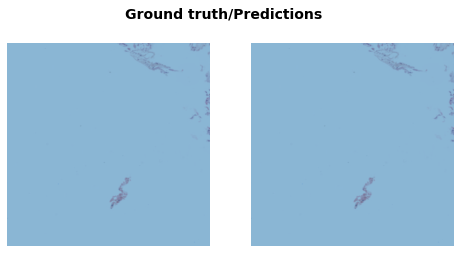

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

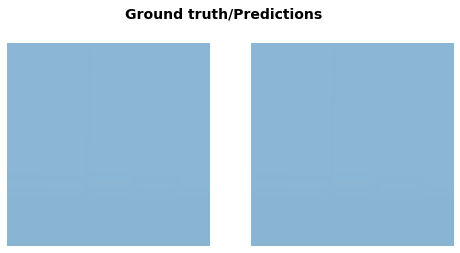

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

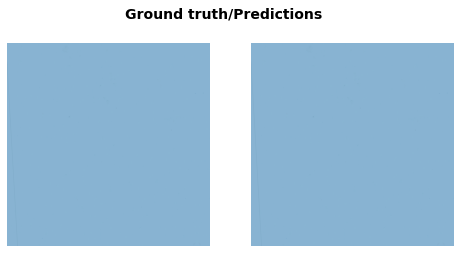

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

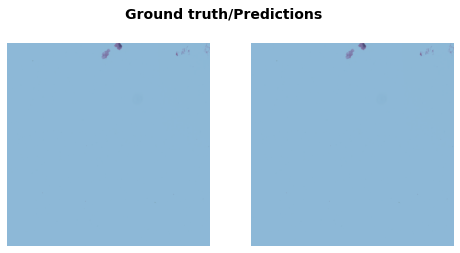

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

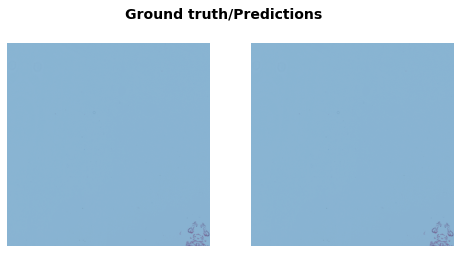

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

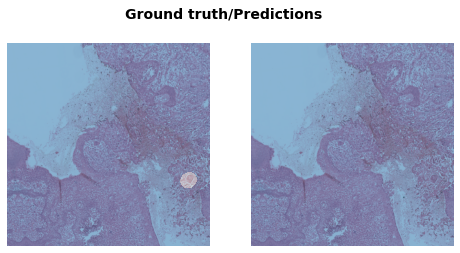

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

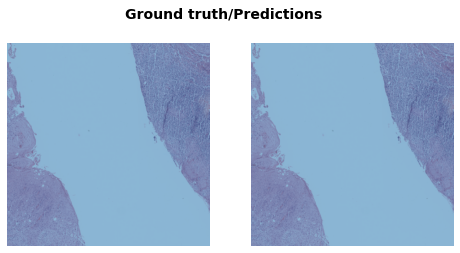

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

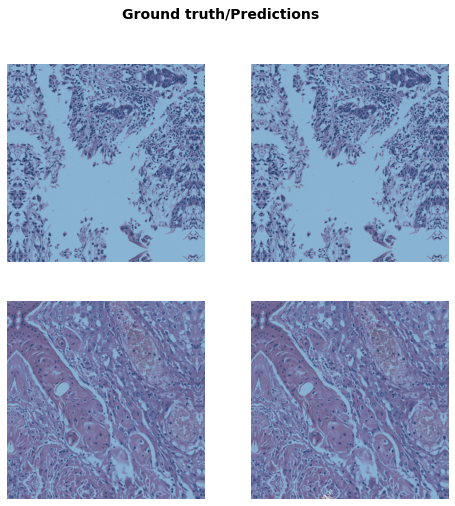

In [31]:
learn.show_results(ds_type=DatasetType.Train)

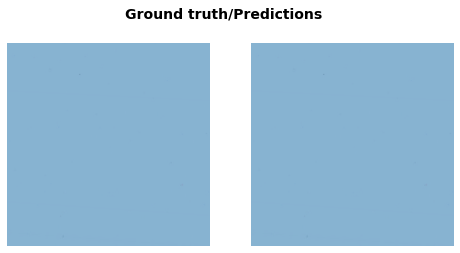

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

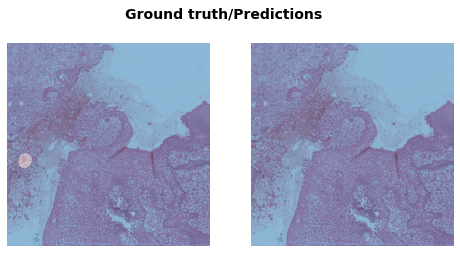

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

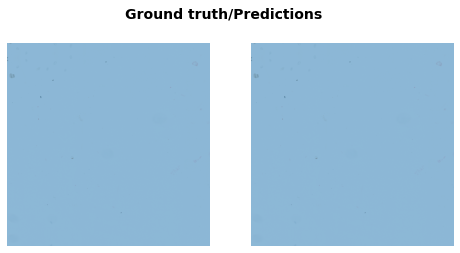

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

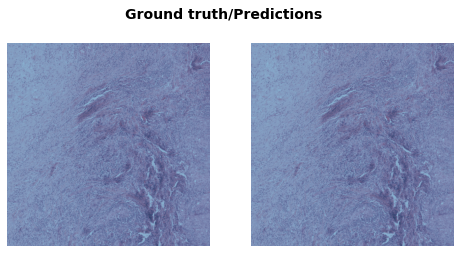

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

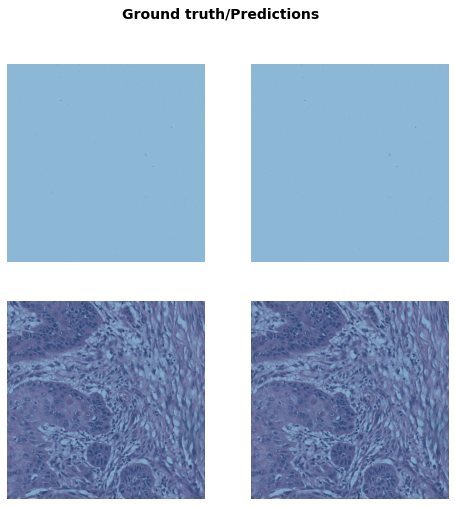

In [32]:
learn.show_results(ds_type=DatasetType.Train)

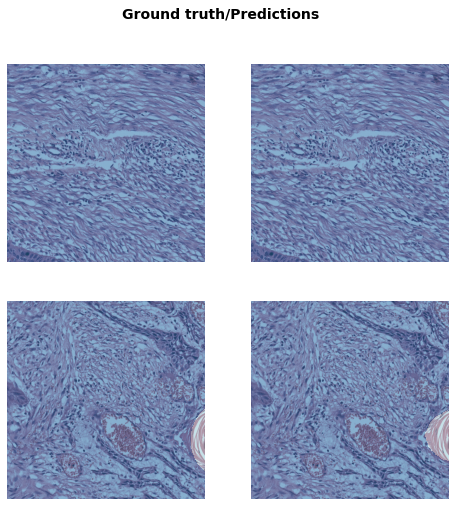

In [33]:
learn.show_results(ds_type=DatasetType.Valid)

In [94]:
n=182
pred=learn.predict(data.valid_ds.x[n])

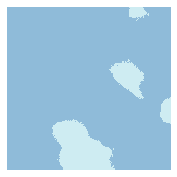

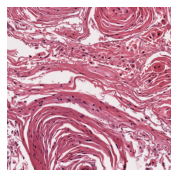

In [96]:
pred[0].show()
data.valid_ds.x[n].show()

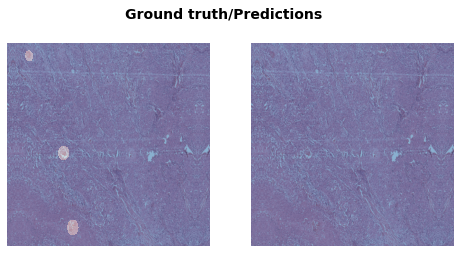

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

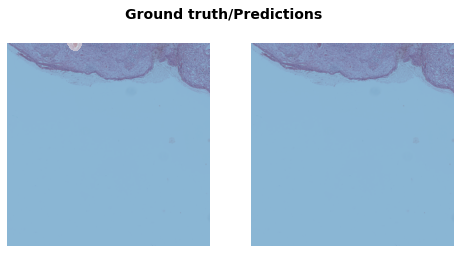

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

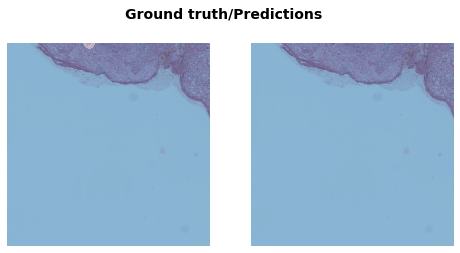

In [ ]:
learn.show_results(ds_type=DatasetType.Train)

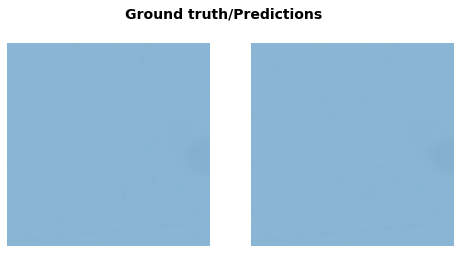

In [ ]:
learn.show_results(ds_type=DatasetType.Train)